In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import cm, colors

In [ ]:
PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / "data/weatherstations/ACIS/TDD/tdd_climatologies"

In [ ]:
stations_tddclim = stationdata.glob("*.csv")
stations_tddclim_list = list(stations_tddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_tddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,tdd
d_since_march1,,
0,7.33,0.00
1,4.54,0.00
2,5.13,0.00
3,6.68,0.00
4,8.46,0.00
...,...,...
117,61.28,29.28
118,60.83,28.83
119,60.87,28.87


In [ ]:
stationname = stations_tddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata['tdd'].cumsum())
testdf.columns = [stationname]
testdf

,COLLEGE_OBSERVATORY
d_since_march1,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
117,1312.75
118,1341.58
119,1370.45


<AxesSubplot: xlabel='d_since_march1', ylabel='COLLEGE_OBSERVATORY'>

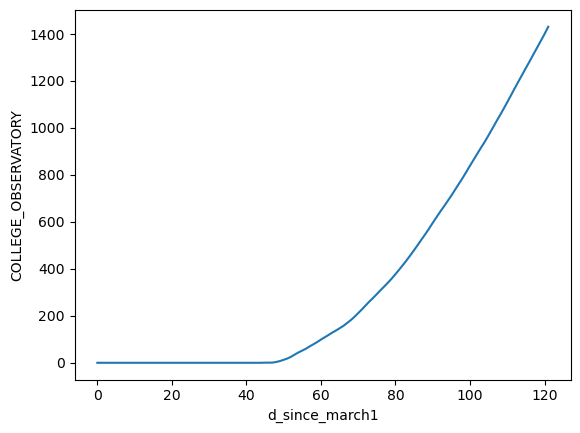

In [ ]:
sb.lineplot(data=testdf[stationname])

### Loop

In [ ]:
alltdd = []
for fpth in stations_tddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['tdd'].cumsum())
    testdf.columns = [stationname]
    alltdd.append(testdf)

Text(0, 0.5, 'Thawing degree days (F)')

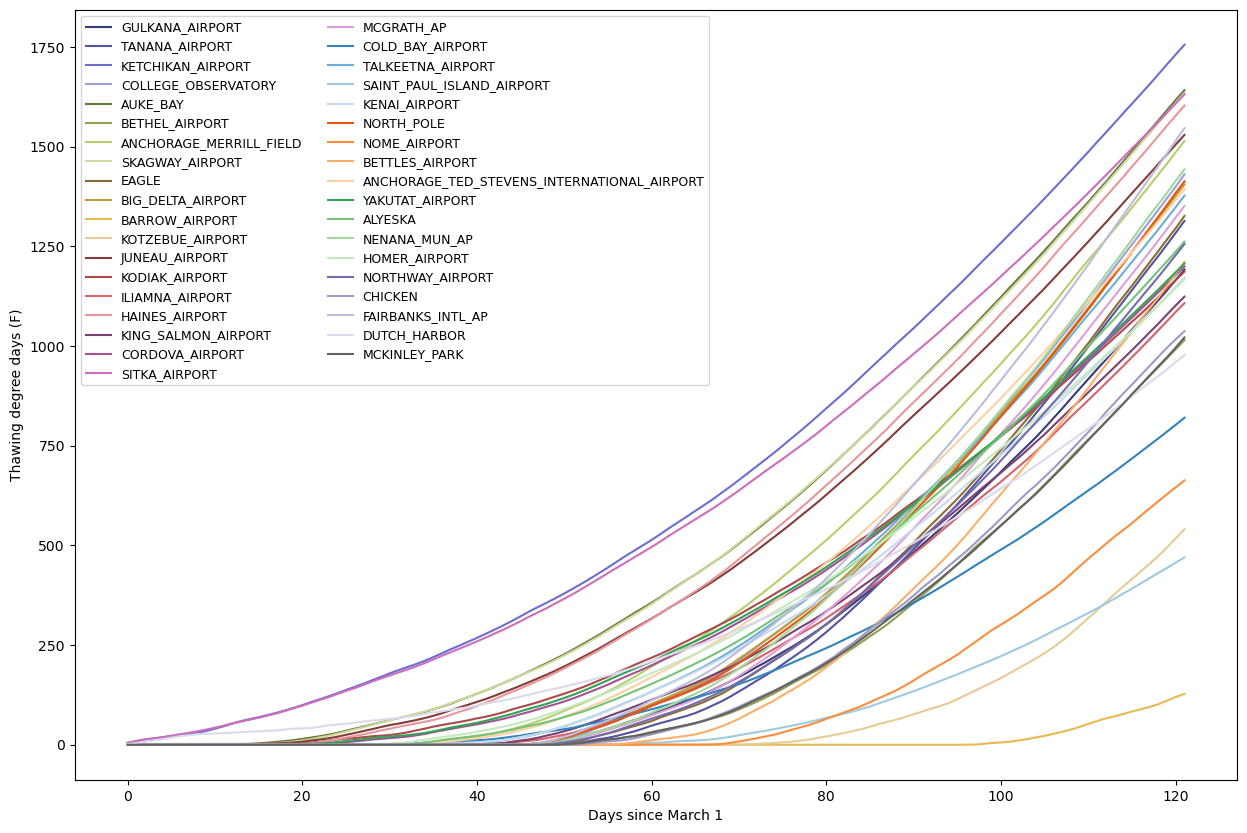

In [ ]:
clrs = plt.cm.rainbow(np.linspace(0, 1, len(alltdd)))
clrs = plt.cm.tab20b.colors + plt.cm.tab20c.colors

fig, ax = plt.subplots(figsize=(15, 10))
pd.concat(alltdd, axis=1).plot(ax=ax, legend=False, color=clrs)
ax.legend(fontsize=9, ncol=2, loc='upper left')
ax.set_xlabel('Days since March 1')
ax.set_ylabel('Thawing degree days (F)')


In [ ]:
outpath = PROJPATH / "data/weatherstations/ACIS/TDD/"
fn = "all_cumul_clim1991_2020.csv"

with open(outpath / fn, 'w') as dst:
    dst.write(f"# All climatologies for cumulative TDD, 1991-2020\n")
    dst.write(f"# Cumulative thawing degree days starting March 1 from ACIS\n")
    dst.write("#\n")
    pd.concat(alltdd, axis=1).to_csv(dst, float_format='%.2f')

In [ ]:
allcumultddds = pd.concat(alltdd, axis=1)
allcumultddds

,GULKANA_AIRPORT,TANANA_AIRPORT,KETCHIKAN_AIRPORT,COLLEGE_OBSERVATORY,AUKE_BAY,BETHEL_AIRPORT,ANCHORAGE_MERRILL_FIELD,SKAGWAY_AIRPORT,EAGLE,BIG_DELTA_AIRPORT,...,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,YAKUTAT_AIRPORT,ALYESKA,NENANA_MUN_AP,HOMER_AIRPORT,NORTHWAY_AIRPORT,CHICKEN,FAIRBANKS_INTL_AP,DUTCH_HARBOR,MCKINLEY_PARK
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,4.30,0.00,0.10,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.86,0.00
1,0.00,0.00,8.65,0.00,0.24,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.21,0.00
2,0.00,0.00,13.33,0.00,0.24,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.46,0.00
3,0.00,0.00,15.84,0.00,0.24,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.73,0.00
4,0.00,0.00,18.42,0.00,0.24,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1089.80,1197.70,1656.02,1312.75,1540.05,924.30,1402.03,1532.79,1209.40,1291.97,...,1287.18,1120.21,1164.24,1327.39,1080.11,1146.83,949.87,1421.01,908.20,925.74
118,1114.59,1225.56,1681.10,1341.58,1565.31,946.68,1429.66,1559.27,1237.86,1319.18,...,1313.30,1141.43,1188.43,1355.51,1101.23,1173.10,972.87,1451.41,924.52,949.08
119,1139.42,1254.35,1706.48,1370.45,1591.26,969.11,1457.16,1584.69,1266.97,1347.30,...,1339.78,1163.26,1212.25,1383.96,1123.23,1200.33,995.61,1482.66,941.57,971.67
